# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key +"&units=" + units + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mil'kovo
Processing Record 2 of Set 1 | yar
Processing Record 3 of Set 1 | champasak
Processing Record 4 of Set 1 | princeville
Processing Record 5 of Set 1 | arvayheer
Processing Record 6 of Set 1 | waitangi
Processing Record 7 of Set 1 | lebu
Processing Record 8 of Set 1 | argo
Processing Record 9 of Set 1 | lampazos de naranjo
Processing Record 10 of Set 1 | luderitz
Processing Record 11 of Set 1 | koksovyy
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | puerto natales
Processing Record 14 of Set 1 | north bondi
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | mozhaysk
Processing Record 17 of Set 1 | atafu village
Processing Record 18 of Set 1 | carnarvon
Processing Record 19 of Set 1 | nikolayevsk-on-amure
Processing Record 20 of Set 1 | iskateley
Processing Record 21 of Set 1 | adamstown
Processing Record 22 of Set 1 | remire-montjoly
Proce

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mil'kovo,55.6078,37.7956,3.73,81,100,5.32,RU,1696885276
1,yar,58.2490,52.1026,2.46,97,99,4.49,RU,1696885276
2,champasak,14.7500,106.0000,22.18,99,81,0.71,LA,1696885276
3,princeville,45.7668,-61.2985,16.97,79,0,2.03,CA,1696885276
4,arvayheer,46.2639,102.7750,4.28,42,4,1.99,MN,1696885277


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mil'kovo,55.6078,37.7956,3.73,81,100,5.32,RU,1696885276
1,yar,58.2490,52.1026,2.46,97,99,4.49,RU,1696885276
2,champasak,14.7500,106.0000,22.18,99,81,0.71,LA,1696885276
3,princeville,45.7668,-61.2985,16.97,79,0,2.03,CA,1696885276
4,arvayheer,46.2639,102.7750,4.28,42,4,1.99,MN,1696885277


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

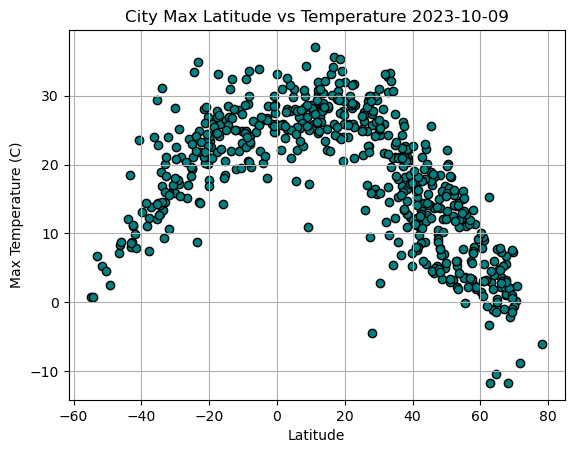

In [29]:
# Build scatter plot for latitude vs. temperature
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Max Temp"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")

plt.title(f"City Max Latitude vs Temperature {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

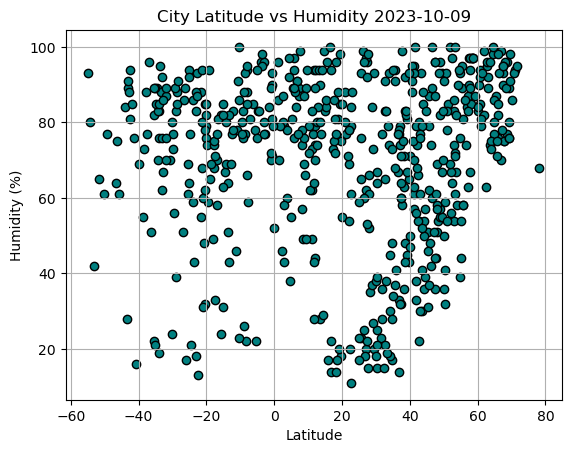

In [28]:
# Build the scatter plots for latitude vs. humidity
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Humidity"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Humidity {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

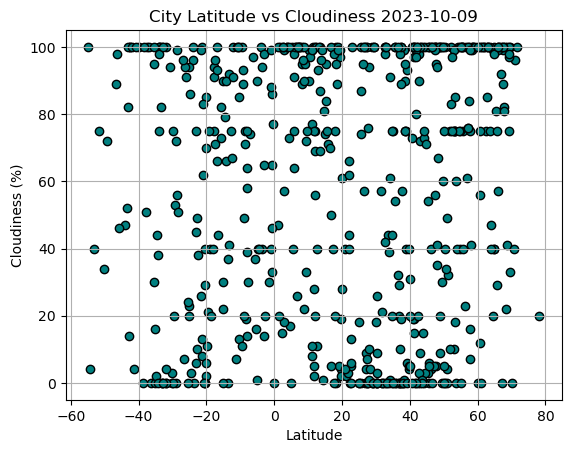

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Cloudiness"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Cloudiness {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

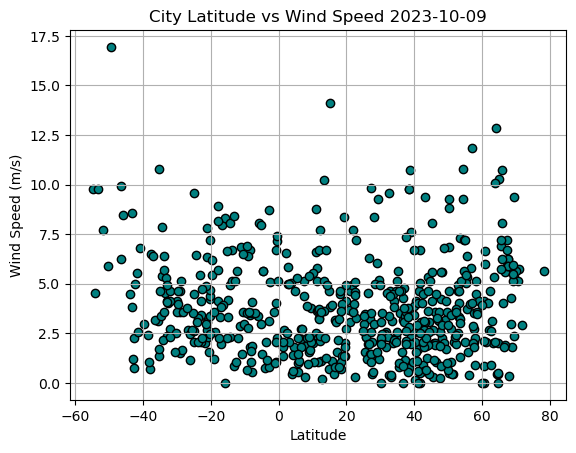

In [26]:
# Build the scatter plots for latitude vs. wind speed
x = [float(city["Lat"]) for city in city_data]
y = [float(city["Wind Speed"]) for city in city_data]
plt.scatter(x,y,marker="o", facecolor="teal", edgecolors="k")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Get today's date
today_date = time.strftime("%Y-%m-%d")
plt.title(f"City Latitude vs Wind Speed {today_date}")

# Enable the grid
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
from scipy import stats

def Create_Linear_regression_plot(x, y, x_label, y_label, i, j):
    x = np.array(x)
    y = np.array(y)
    
    # Perform linear regression using scipy's linregress
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)
    
    # Calculate the regression line
    regress_values = x * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))    
    
    # Create a scatter plot of the data points
    plt.scatter(x, y, label="Data Points", color="teal")
    
    # Plot the regression line
    plt.plot(x, regress_values, label="Linear Regression", color="red")
    
    # Customize plot labels and title
    plt.xlabel(x_label if x_label else "X-axis")
    plt.ylabel(y_label if y_label else "Y-axis")
    
    plt.annotate(line_eq, (i, j), fontsize=15, color="r")
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat >= 0:
        north_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
north_df=pd.DataFrame(north_data)

# Set "City_ID" as the index column
north_df.set_index("City_ID", inplace=True)

# Filter the DataFrame for the Northern Hemisphere
north_hemi_df = north_df[north_df["Lat"] >= 0]

# Display
north_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,mil'kovo,55.6078,37.7956,3.73,81.0,100.0,5.32,RU,1696885276
1,yar,58.2490,52.1026,2.46,97.0,99.0,4.49,RU,1696885276
2,champasak,14.7500,106.0000,22.18,99.0,81.0,0.71,LA,1696885276
3,princeville,45.7668,-61.2985,16.97,79.0,0.0,2.03,CA,1696885276
4,arvayheer,46.2639,102.7750,4.28,42.0,4.0,1.99,MN,1696885277


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_data=[]

for k, city in enumerate(city_data):
    city_lat = float(city["Lat"])
    if city_lat < 0:
        south_data.append({
            "City": city["City"], 
            "Lat": float(city["Lat"]), 
            "Lng": float(city["Lng"]), 
            "Max Temp": float(city["Max Temp"]),
            "Humidity": float(city["Humidity"]),
            "Cloudiness": float(city["Cloudiness"]),
            "Wind Speed": float(city["Wind Speed"]),
            "Country": city["Country"],
            "Date": city["Date"],
            "City_ID": k 
        })
        
# Create a DataFrame
south_df=pd.DataFrame(south_data)

# Set "City_ID" as the index column
south_df.set_index("City_ID", inplace=True)

# Filter the DataFrame for the Southern Hemisphere
south_hemi_df = south_df[south_df["Lat"] < 0]

# Display sample data for the Southern Hemisphere
south_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,waitangi,-43.9535,-176.5597,12.12,84.0,47.0,4.47,NZ,1696885277
6,lebu,-37.6167,-73.6500,12.26,77.0,100.0,6.51,CL,1696885277
9,luderitz,-26.6481,15.1594,15.17,86.0,7.0,2.67,NA,1696885278
11,invercargill,-46.4000,168.3500,8.34,75.0,98.0,6.26,NZ,1696885003
12,puerto natales,-51.7236,-72.4875,5.25,65.0,75.0,7.72,CL,1696885279


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6962739429542815


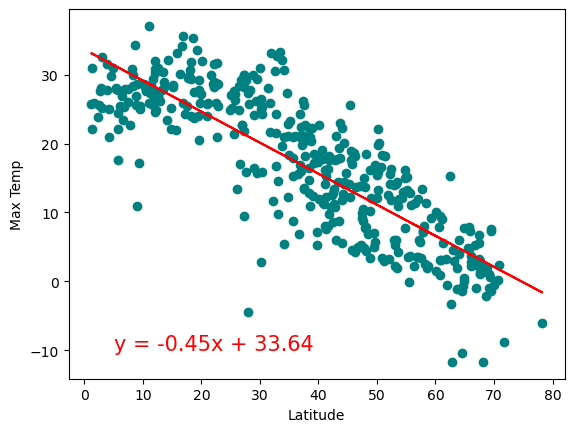

In [23]:
# Linear regression on Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [temp["Max Temp"] for temp in north_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = 5
j = -10
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.5648603933286149


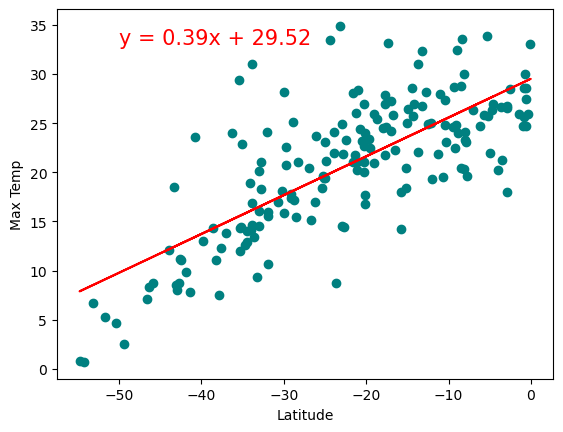

In [24]:
# Linear regression on Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [temp["Max Temp"] for temp in south_data]
x_lable ="Latitude"
y_lable="Max Temp"
i = -50
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** 

After completing the linear regression analysis, we have gained valuable insights into the impact of latitude on temperature. It is evident that latitude plays a significant role in determining temperature variations, with an R-value of nearly 70% in the Northern Hemisphere and 56.5% in the Southern Hemisphere.

Northern Hemisphere vs. Southern Hemisphere:

The influence of latitude on temperature exhibits a distinct contrast between the Northern and Southern Hemispheres. In the Northern Hemisphere, we observe a clear trend where temperatures tend to decrease as one moves further away from the equator toward higher latitudes. This means that cities in the Northern Hemisphere generally experience lower temperatures as they are situated at higher latitudes.

Conversely, in the Southern Hemisphere, we discover an opposing trend. Here, temperatures tend to increase as we move away from the equator toward higher latitudes. In simpler terms, cities in the Southern Hemisphere generally experience higher temperatures at higher latitudes.

In summary, the linear regression analysis has unveiled the striking disparity in how latitude influences temperature in the Northern and Southern Hemispheres. These findings provide valuable insights into the distinct weather patterns that prevail in each hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.02770052310957442


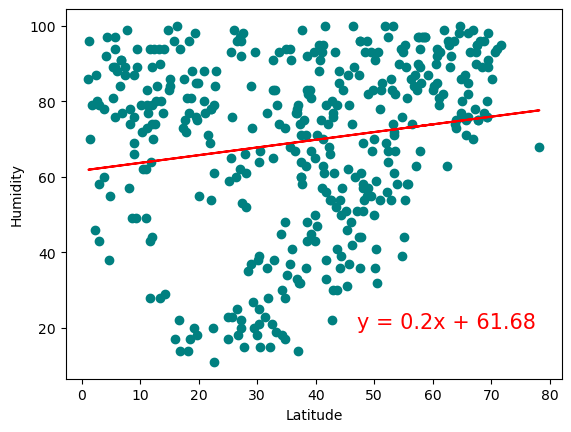

In [17]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [humidity["Humidity"] for humidity in north_data]
x_lable ="Latitude"
y_lable="Humidity"
i = 47
j = 20
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.005030122481147158


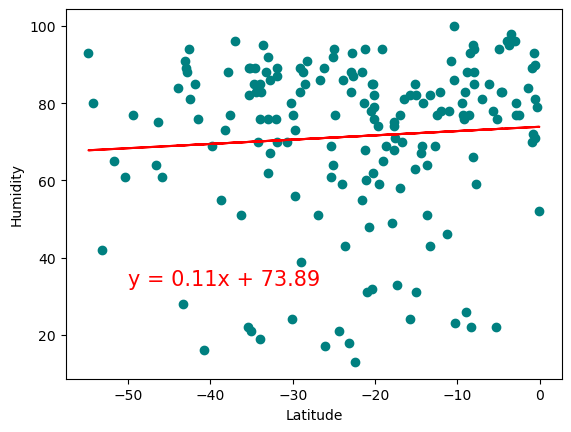

In [25]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [humidity["Humidity"] for humidity in south_data]
x_lable ="Latitude"
y_lable="Humidity"
i = -50
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** 

Upon conducting linear regression analysis to assess the impact of latitude on humidity, it becomes evident that latitude has minimal influence on humidity levels. The analysis reveals that the linear relationship between latitude and humidity is relatively weak, with the R-value being less than 1% in both Northern and Southern Hemisphere.

Northern Hemisphere vs. Southern Hemisphere:

In both the Northern and Southern Hemispheres, the linear regression analysis indicates that there is no substantial correlation between latitude and humidity. As one moves from the equator towards higher latitudes or vice versa, humidity levels do not exhibit a consistent or significant pattern. This implies that latitude alone does not serve as a reliable predictor for humidity variations.

In summary, the linear regression analysis suggests that humidity levels are not strongly associated with latitude, both in the Northern and Southern Hemispheres. The weak correlation and low R-value indicate that humidity variations are influenced by a complex interplay of multiple factors beyond latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0030088095031246855


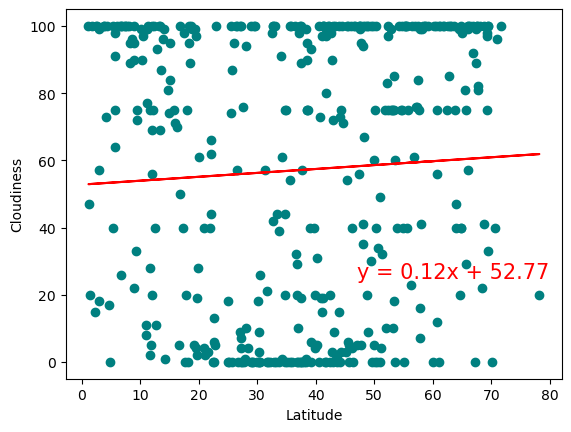

In [31]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [cloudiness["Cloudiness"] for cloudiness in north_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = 47
j = 25
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.00011065436077425971


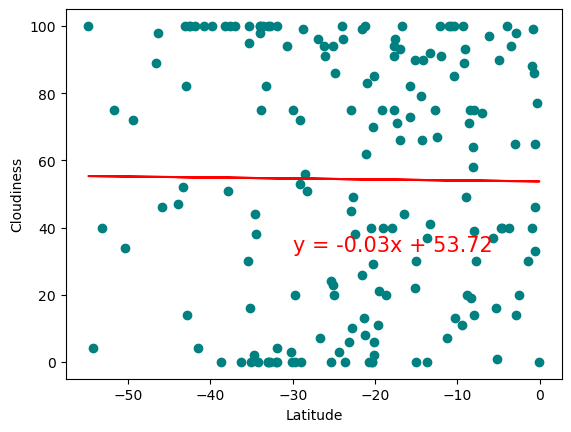

In [32]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [cloudiness["Cloudiness"] for cloudiness in south_data]
x_lable ="Latitude"
y_lable="Cloudiness"
i = -30
j = 33
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** 

When examining the impact of latitude on cloudiness through linear regression analysis, it becomes evident that latitude has little influence on cloud cover. The analysis reveals that the linear relationship between latitude and cloudiness is relatively weak, with an R-value of less than 1% in both Northern and Southern Hemisphere.

Northern Hemisphere vs. Southern Hemisphere:

In both the Northern and Southern Hemispheres, the linear regression analysis suggests that there is no substantial correlation between latitude and cloudiness. As one moves from the equator towards higher latitudes or vice versa, cloud cover levels do not exhibit a consistent or significant pattern. This implies that latitude alone does not serve as a reliable predictor for cloudiness variations.

In summary, the linear regression analysis indicates that cloudiness is not strongly associated with latitude, both in the Northern and Southern Hemispheres. The weak correlation and low R-value suggest that cloud cover is influenced by a complex interplay of multiple factors beyond latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.024243974450954976


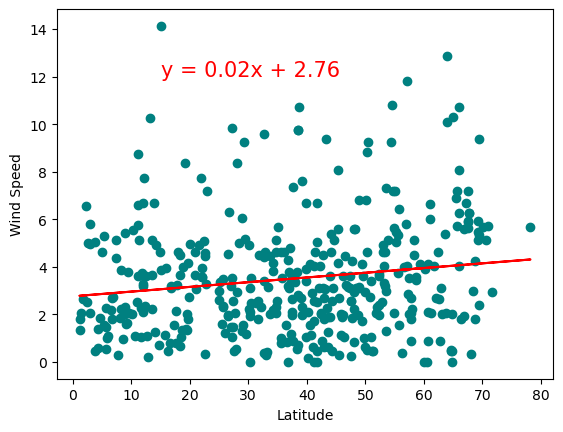

In [21]:
# Northern Hemisphere
x = [lat["Lat"] for lat in north_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in north_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = 15
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

The r-value is: 0.04269648135927662


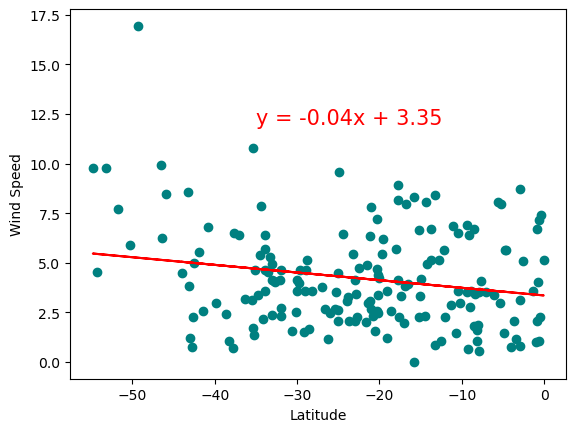

In [22]:
# Southern Hemisphere
x = [lat["Lat"] for lat in south_data]
y = [wind_Speed["Wind Speed"] for wind_Speed in south_data]
x_lable ="Latitude"
y_lable="Wind Speed"
i = -35
j = 12
Create_Linear_regression_plot(x, y, x_lable, y_lable, i, j)

**Discussion about the linear relationship:** 

Upon examining the impact of latitude on wind speed through linear regression analysis, it is evident that latitude has a limited influence on wind speed. The analysis reveals that the linear relationship between latitude and wind speed is relatively weak, with R-values of less than 2.5% in the Northern Hemisphere and only 4.3% in the Southern Hemisphere.

Northern Hemisphere vs. Southern Hemisphere:

In both the Northern and Southern Hemispheres, the linear regression analysis suggests that there is no substantial correlation between latitude and wind speed. As one moves from the equator towards higher latitudes or vice versa, wind speed does not exhibit a consistent or significant pattern. This implies that latitude alone does not serve as a strong predictor for variations in wind speed.

In summary, the linear regression analysis indicates that wind speed is not strongly associated with latitude, both in the Northern and Southern Hemispheres. The weak correlation and low R-values suggest that wind speed is influenced by a complex interplay of multiple meteorological factors beyond latitude.